In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import IPython.display as display

import nibabel as nib
import dipy.reconst.csdeconv as csd
import dipy.core.gradients as grad
import dipy.viz.fvtk as fvtk
import dipy.data as dpd
import dipy.reconst.peaks as dpp
from dipy.tracking.eudx import EuDX

In [13]:
data = nib.load('./SUB1_b2000_1.nii.gz').get_data()
gtab = grad.gradient_table('./SUB1_b2000_1.bvals', './SUB1_b2000_1.bvecs')

In [14]:
response, ratio = csd.auto_response(gtab, data, roi_radius=10, fa_thr=0.7)

We fit the model to a small ROI, centerd on the corpus callosum and parts of the superior longitudinal fasciculus and 

In [64]:
data_small = data[20:50, 55:85, 36:39]
csd_model = csd.ConstrainedSphericalDeconvModel(gtab, response)
csd_fit = csd_model.fit(data_small)
csd_odf = csd_fit.odf(sphere)

In [65]:
sphere = dpd.get_sphere('symmetric724')

In [66]:
ren = fvtk.ren()
fodf_spheres = fvtk.sphere_funcs(csd_odf, sphere, scale=1.3, norm=False)
fvtk.add(ren, fodf_spheres)
fvtk.record(ren, out_path='csd_odfs.png', size=(600, 600))


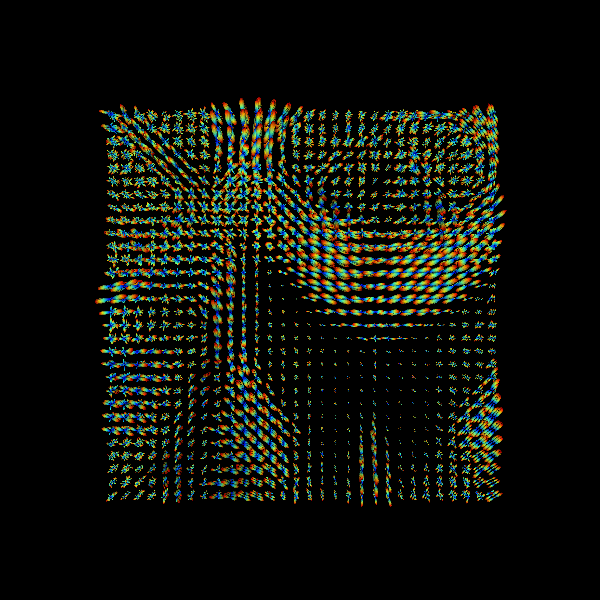

In [67]:
display.display(display.Image('./csd_odfs.png'))

In [68]:
csd_peaks = dpp.peaks_from_model(csd_model, data_small, sphere,
                                 relative_peak_threshold=.5,
                                 min_separation_angle=25,
                                 return_sh=False)

In [69]:
fvtk.clear(ren)
fodf_peaks = fvtk.peaks(csd_peaks.peak_dirs, csd_peaks.peak_values, scale=1.3)
fvtk.add(ren, fodf_peaks)
fvtk.record(ren, out_path='csd_peaks.png', size=(600, 600))

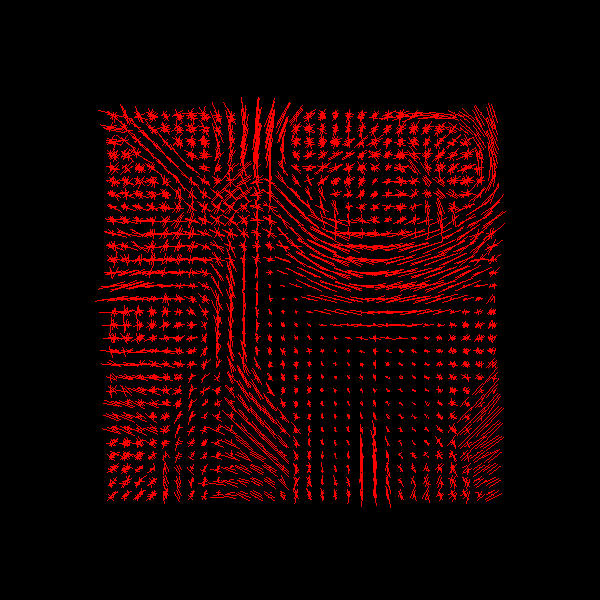

In [70]:
display.display(display.Image('./csd_peaks.png'))

In [71]:
pnm.peak_indices.shape

(30, 30, 1, 5)

In [79]:
eu = EuDX(pnm.gfa, pnm.peak_indices[..., 0], seeds=100, odf_vertices=sphere.vertices, a_low=0.1)

In [80]:
streamlines =[streamline for streamline in eu]

In [81]:
streamlines

[]

In [82]:
pnm.gfa

array([[[ 0.78959351],
        [ 0.7723575 ],
        [ 0.79480758],
        [ 0.74352657],
        [ 0.77381768],
        [ 0.91288162],
        [ 0.92104321],
        [ 0.90718491],
        [ 0.84170256],
        [ 0.82224525],
        [ 0.87982888],
        [ 0.9057608 ],
        [ 0.87354732],
        [ 0.8910349 ],
        [ 0.92145448],
        [ 0.94699593],
        [ 0.92833926],
        [ 0.78261329],
        [ 0.76895408],
        [ 0.70739519],
        [ 0.71329727],
        [ 0.71979599],
        [ 0.69978925],
        [ 0.74078296],
        [ 0.75214086],
        [ 0.73346814],
        [ 0.77254681],
        [ 0.74143058],
        [ 0.7707295 ],
        [ 0.75132615]],

       [[ 0.73583779],
        [ 0.77837629],
        [ 0.75936984],
        [ 0.7593817 ],
        [ 0.78811704],
        [ 0.91807686],
        [ 0.93911491],
        [ 0.92730867],
        [ 0.86644824],
        [ 0.90109311],
        [ 0.91354914],
        [ 0.89806813],
        [ 0.87352974],
        [